### Importando bibliotecas

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Função do calculo da pressão

In [2]:
def presPoisson(p, dx, dy,rho,nu,u,v):
    pn = np.empty_like(p)
    pn = p.copy()
     
    #Term in square brackets
    b[1:-1,1:-1]=rho*(1/dt*((u[1:-1,2:]-u[1:-1,0:-2])/(2*dx)+(v[2:,1:-1]-v[0:-2,1:-1])/(2*dy))-\
                 ((u[1:-1,2:]-u[1:-1,0:-2])/(2*dx))**2-\
                 2*((u[2:,1:-1]-u[0:-2,1:-1])/(2*dy)*(v[1:-1,2:]-v[1:-1,0:-2])/(2*dx))-\
                 ((v[2:,1:-1]-v[0:-2,1:-1])/(2*dy))**2)

    for q in range(nit):
        pn = p.copy()
        p[1:-1,1:-1] = ((pn[1:-1,2:]+pn[1:-1,0:-2])*dy**2+(pn[2:,1:-1]+pn[0:-2,1:-1])*dx**2)/\
                        (2*(dx**2+dy**2)) -\
                        dx**2*dy**2/(2*(dx**2+dy**2))*b[1:-1,1:-1]
        
        ##at y = 2
        p[-1,:] = p[-2,:] - rho*nu/dy*(-2*v[-2,:]+v[-3,:])
        
        #at y = 0
        p[0,:] = p[1,:] - rho*nu/dy*(-2*v[1,:]+v[2,:])
        
        #at x = 0
        p[:,0] = p[:,1] - rho*nu/dx*(-2*u[:,1]+u[:,2])
        
        #at x = 2
        p[:,-1] = p[:,-2] - rho*nu/dx*(-2*u[:,-2]+u[:,-3])      
        
    return p

### Função do calculo da velocidade

In [3]:
def cavityFlow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        p = presPoisson(p, dx, dy, rho, nu, u, v)
        
        u[1:-1,1:-1] = un[1:-1,1:-1]-\
                        un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[1:-1,0:-2])-\
                        vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[0:-2,1:-1])-\
                        dt/(2*rho*dx)*(p[1:-1,2:]-p[1:-1,0:-2])+\
                        nu*(dt/dx**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])+\
                        dt/dy**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1]))

        v[1:-1,1:-1] = vn[1:-1,1:-1]-\
                        un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[1:-1,0:-2])-\
                        vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[0:-2,1:-1])-\
                        dt/(2*rho*dy)*(p[2:,1:-1]-p[0:-2,1:-1])+\
                        nu*(dt/dx**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])+\
                        (dt/dy**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])))

        u[0,:] = 0
        u[:,0] = 0
        u[:,-1] = 0
        u[-1,:] = Uwall    #set velocity on cavity lid equal to Uwall
        v[0,:] = 0
        v[-1,:]=0
        v[:,0] = 0
        v[:,-1] = 0
        
        
    return u, v, p

In [12]:
nx = 51
ny = 51
nt = 5000
nit = 50
Uwall=1.
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)
X,Y = np.meshgrid(x,y)

rho = 1
nu = 0.02
dt = .002

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

u, v, p = cavityFlow(nt, u, v, dt, dx, dy, p, rho, nu)

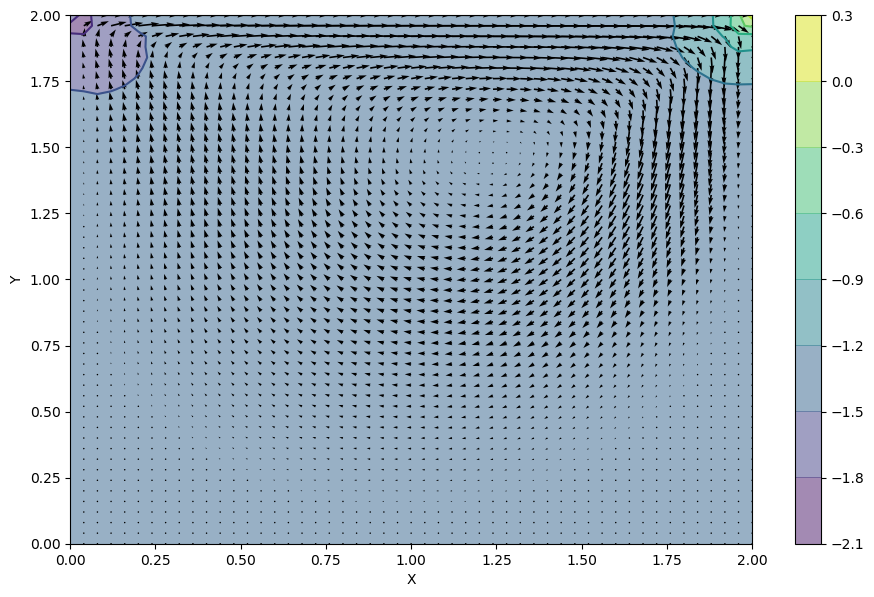

In [13]:
fig = plt.figure(figsize=(11,7), dpi=100)
plt.contourf(X,Y,p,alpha=0.5)    ###plotting the pressure field as a contour
plt.colorbar()
plt.contour(X,Y,p)               ###plotting the pressure field outlines
plt.quiver(X,Y,u,v) ##plotting velocity
plt.xlabel('X')
plt.ylabel('Y');

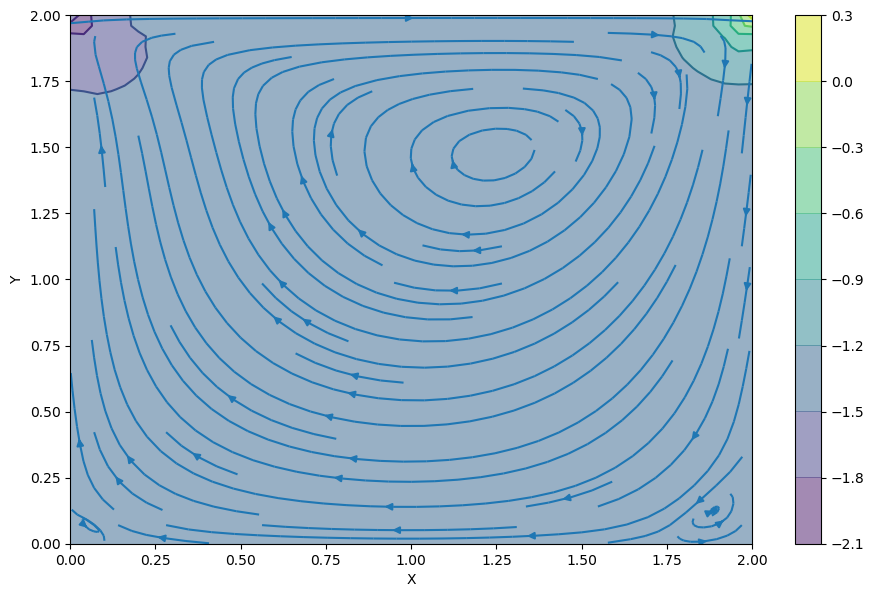

In [14]:
from matplotlib import pyplot, cm

fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p, cmap=cm.viridis)
pyplot.streamplot(X, Y, u, v)
pyplot.xlabel('X')
pyplot.ylabel('Y');